In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from scipy.stats import norm

In [2]:
p = np.random.uniform( 0,1, size = 10000 )

In [5]:
# Bootstraping
def GetMean( p, size= 1000 ):
    
    muestra = random.choices(p, k=size)
    
    return np.mean(muestra)

In [7]:
GetMean(p)

0.4999107705471423

In [8]:
def GetSample(p, Npoints = 1000):
    
    lmean = []
    
    for i in range(int(Npoints)):
        lmean.append(GetMean(p))
        
    return lmean

In [32]:
n = np.logspace(1,4,4)

varl = np.zeros(len(n))

listas = {}

for i in tqdm(range(len(n))):
    l = GetSample(p, Npoints = n[i])
    listas[i] = l
    varl[i] = np.std(l)**2

100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


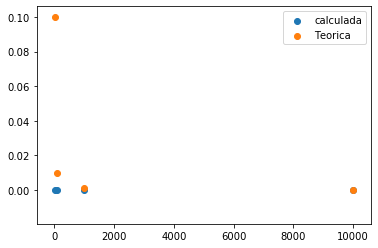

In [33]:
plt.scatter( n, varl, label='calculada' )
plt.scatter( n , 1/n, label='Teorica')
plt.legend()

In [34]:
def GetHisto(l, Nbins=50):
    
    x = np.linspace(np.min(l),np.max(l),Nbins)
    h, bins = np.histogram(l, bins=x)
    w = np.diff(bins)
    
    I = np.sum(h*w)
    
    
    hnorm = h/I
    
    return h,hnorm,bins,w

In [46]:
h, hnorm, bins, w = GetHisto(listas[2])
print(np.sum(h))
print(np.sum(hnorm*w))

1000
1.0000000000000002


<BarContainer object of 49 artists>

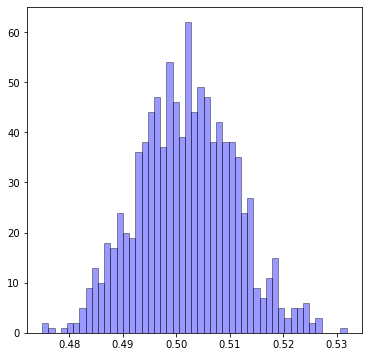

In [47]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.bar( bins[:-1] + 0.5*w[0], h, color='b', width = w, ec='k', alpha=0.4 )

In [48]:
mu, sigma = norm.fit( listas[2] )
y = norm.pdf( bins, mu, sigma )
print(mu,sigma)

0.5018289930329052 0.009061752989719136


Text(0.5, 1.0, 'Fit results: mu = 0.50,  std = 0.01')

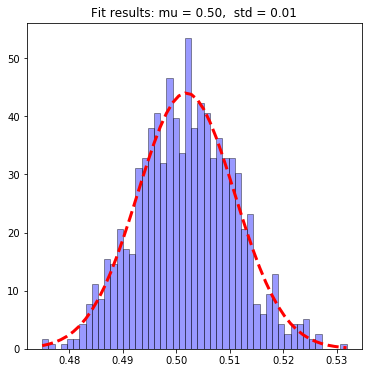

In [49]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.bar( bins[:-1] + 0.5*w[0], hnorm, color='b', width = w, ec='k', alpha=0.4 )
ax.plot( bins, y , 'r--', linewidth = 3 )

title = "Fit results: mu = %.2f,  std = %.2f" % (mu, sigma)
ax.set_title(title)